In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from datetime import datetime
import random
import os

#Loading the dataset

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key=)
project = rf.workspace("brad-dwyer").project("wildfire-smoke")
dataset = project.version(1).download("coco")

#Installing Detectron 2

In [ ]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

In [ ]:
#logger
from detectron2.utils.logger import setup_logger
setup_logger()

# DATA SET PREPARATION AND LOADING
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.data.datasets import register_coco_instances


# VISUALIZATION
from detectron2.utils.visualizer import Visualizer
from detectron2.utils.visualizer import ColorMode

# CONFIGURATION
from detectron2 import model_zoo
from detectron2.config import get_cfg

# EVALUATION
from detectron2.engine import DefaultPredictor

# TRAINING
from detectron2.engine import DefaultTrainer

In [ ]:
register_coco_instances("train", {}, "/content/Wildfire-Smoke-1/train/_annotations.coco.json", "/content/Wildfire-Smoke-1/train")
register_coco_instances("valid", {}, "/content/Wildfire-Smoke-1/valid/_annotations.coco.json", "/content/Wildfire-Smoke-1/valid")
register_coco_instances("test", {}, "/content/Wildfire-Smoke-1/test/_annotations.coco.json", "/content/Wildfire-Smoke-1/test")

WARNING [11/15 19:04:02 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[11/15 19:04:02 d2.data.datasets.coco]: Loaded 516 images in COCO format from /content/Wildfire-Smoke-1/train/_annotations.coco.json


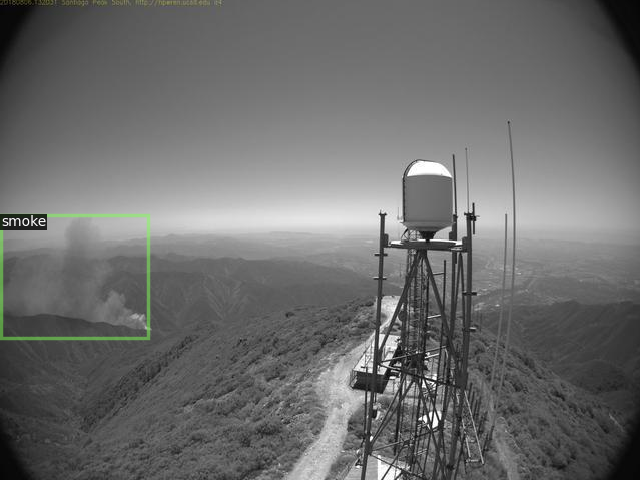

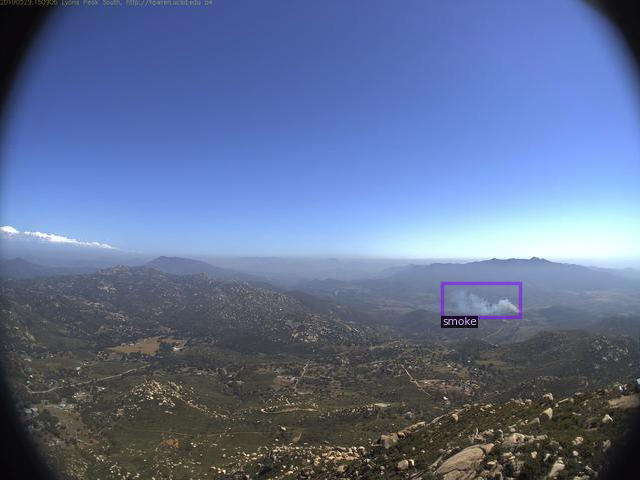

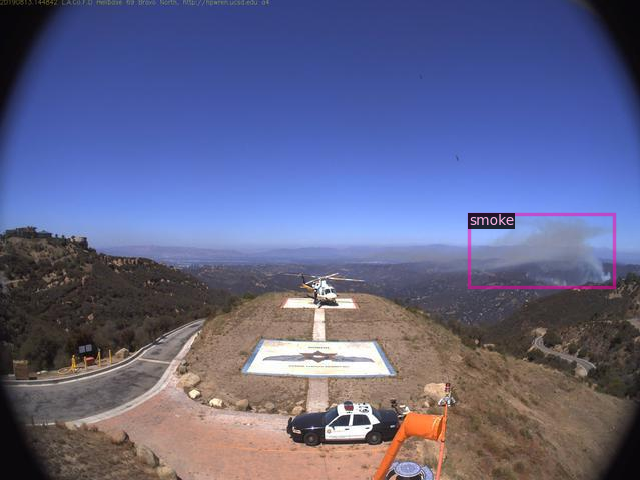

In [ ]:
#see if the annotation is correct
metadata=MetadataCatalog.get("train")
dataset_train = DatasetCatalog.get("train")
for d in random.sample(dataset_train, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img, metadata=metadata)
    out = visualizer.draw_dataset_dict(d)
    cv2_imshow(out.get_image())

Training

In [ ]:
#Hyperparameters
ARCHITECTURE = "faster_rcnn_X_101_32x8d_FPN_3x"
CONFIG_FILE_PATH = f"COCO-Detection/{ARCHITECTURE}.yaml"
MAX_ITER = 150
EVAL_PERIOD = 200
BASE_LR = 0.002
NUM_CLASSES = 2

# OUTPUT DIR
OUTPUT_DIR_PATH = os.path.join(
    ('train'),
    ARCHITECTURE,
    datetime.now().strftime('%Y-%m-%d-%H-%M-%S')
)

os.makedirs(OUTPUT_DIR_PATH, exist_ok=True)

In [ ]:
#Configuration
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file(CONFIG_FILE_PATH))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(CONFIG_FILE_PATH)
cfg.DATASETS.TRAIN = ("train",)
cfg.DATASETS.TEST = ("test",)
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.TEST.EVAL_PERIOD = EVAL_PERIOD
cfg.DATALOADER.NUM_WORKERS = 2
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = BASE_LR
cfg.SOLVER.MAX_ITER = MAX_ITER
cfg.MODEL.ROI_HEADS.NUM_CLASSES = NUM_CLASSES
cfg.OUTPUT_DIR = OUTPUT_DIR_PATH



In [ ]:
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[11/15 19:51:35 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[11/15 19:51:40 d2.engine.train_loop]: Starting training from iteration 0
[11/15 19:52:12 d2.utils.events]:  eta: 0:03:25  iter: 19  total_loss: 0.9392  loss_cls: 0.7562  loss_box_reg: 0.02147  loss_rpn_cls: 0.1186  loss_rpn_loc: 0.01046    time: 1.6268  last_time: 1.8774  data_time: 0.0183  last_data_time: 0.0084   lr: 0.00025508  max_mem: 5358M
[11/15 19:52:44 d2.utils.events]:  eta: 0:02:55  iter: 39  total_loss: 0.6665  loss_cls: 0.2759  loss_box_reg: 0.3087  loss_rpn_cls: 0.0211  loss_rpn_loc: 0.01081    time: 1.6170  last_time: 1.2491  data_time: 0.0102  last_data_time: 0.0059   lr: 0.00052148  max_mem: 5358M
[11/15 19:53:15 d2.utils.events]:  eta: 0:02:23  iter: 59  total_loss: 0.7458  loss_cls: 0.2796  loss_box_reg: 0.4945  loss_rpn_cls: 0.01101  loss_rpn_loc: 0.007193    time: 1.5993  last_time: 1.4048  data_time: 0.0104  last_data_time: 0.0058   lr: 0.00078788  max_mem: 5358M
[11/15 19:53:49 d2.utils.events]:  eta: 0:01:52  iter: 79  total_loss: 0.7128  loss_cls: 0.185  loss_

#Inference

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7
predictor = DefaultPredictor(cfg)

[11/15 19:58:16 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from train/faster_rcnn_X_101_32x8d_FPN_3x/2023-11-15-19-51-25/model_final.pth ...


#Testing

WARNING [11/15 20:00:25 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[11/15 20:00:25 d2.data.datasets.coco]: Loaded 147 images in COCO format from /content/Wildfire-Smoke-1/valid/_annotations.coco.json


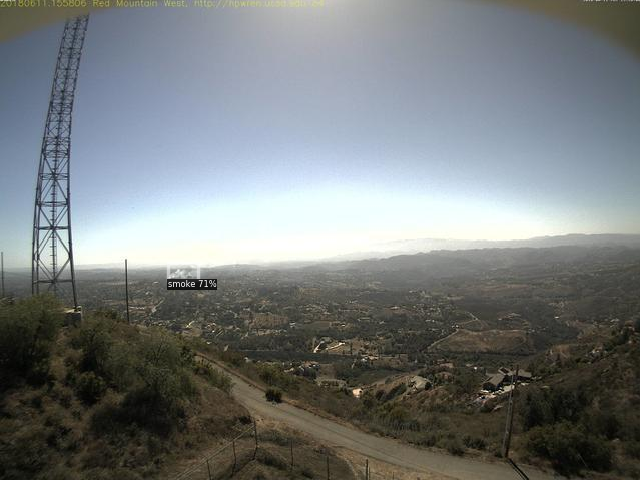

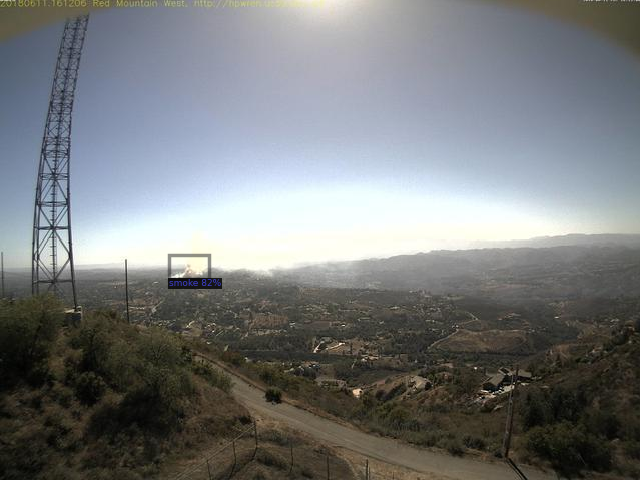

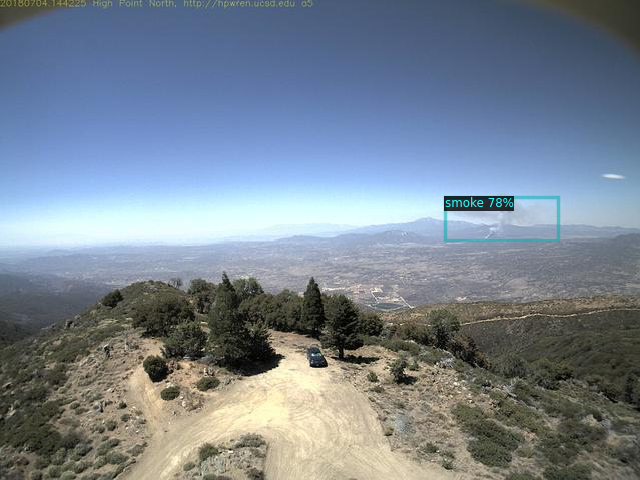

In [ ]:

dataset_val=DatasetCatalog.get("valid")
for d in random.sample(dataset_val, 3):
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im,
                   metadata=metadata)
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(out.get_image())